In [38]:
# Assignment 6
# Author: Jake Daly

import pandas as pd

import matplotlib.pyplot as plt

url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

df = pd.read_csv(url, skiprows=22)

df.head()

C:\Users\jaked\AppData\Local\Temp\ipykernel_4640\2873403194.py:10: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=22)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248394 entries, 0 to 248393
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    248394 non-null  object 
 1   ind     248394 non-null  int64  
 2   rain    248394 non-null  object 
 3   ind.1   248394 non-null  int64  
 4   temp    248394 non-null  float64
 5   ind.2   248394 non-null  int64  
 6   wetb    248394 non-null  float64
 7   dewpt   248394 non-null  float64
 8   vappr   248394 non-null  float64
 9   rhum    248394 non-null  int64  
 10  msl     248394 non-null  object 
 11  ind.3   248394 non-null  int64  
 12  wdsp    248394 non-null  object 
 13  ind.4   248394 non-null  int64  
 14  wddir   248394 non-null  object 
 15  ww      248394 non-null  object 
 16  w       248394 non-null  object 
 17  sun     248394 non-null  float64
 18  vis     248394 non-null  object 
 19  clht    248394 non-null  object 
 20  clamt   248394 non-null  object 
dtypes: float64

In [40]:
df['Time'] = pd.to_datetime(df['date'])

df = df.dropna(subset=['temp'])

C:\Users\jaked\AppData\Local\Temp\ipykernel_4640\3453368541.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['date'])


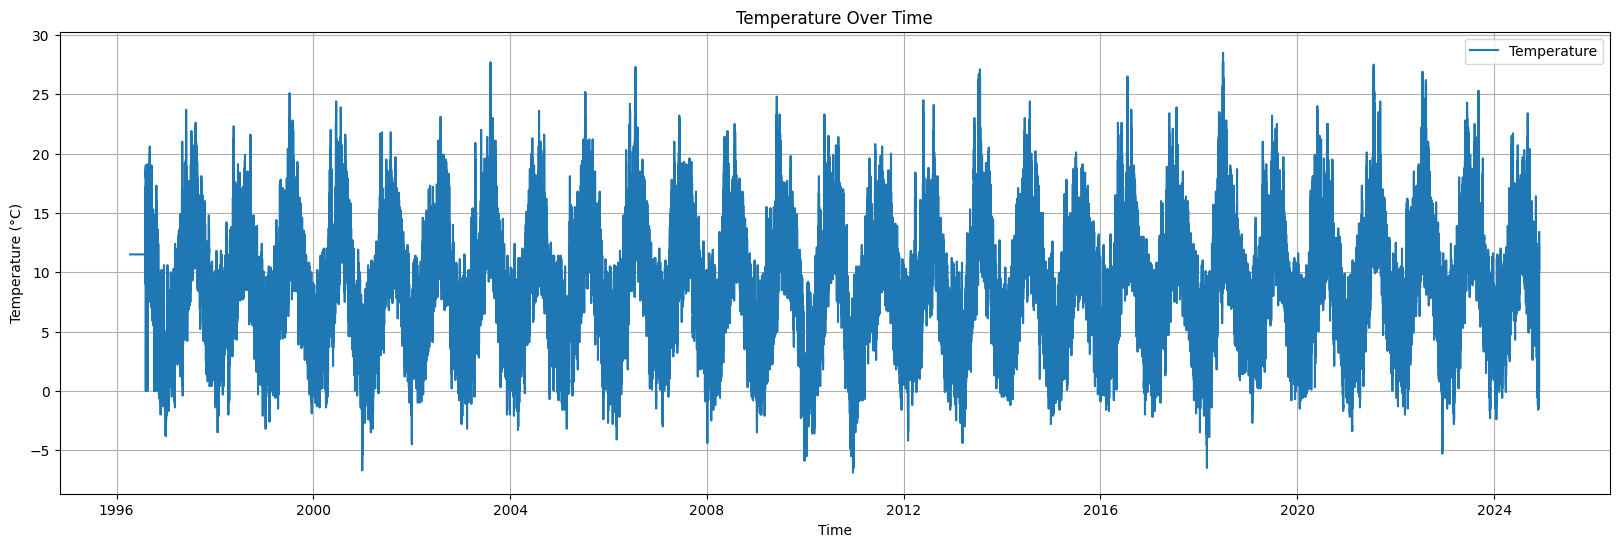

In [41]:
plt.figure(figsize=(20, 6))
plt.plot(df['Time'], df['temp'], label='Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# extract the date (without the time) and create a new column 'Day'
df['Day'] = df['Time'].dt.date

# calculate the mean temperature for each day by grouping by 'Day'
daily_mean_temp = df.groupby('Day')['temp'].mean()

# display the result
print(daily_mean_temp)

# Resource
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

Day
1996-04-10    11.500000
1996-07-31    12.650000
1996-08-01    11.666667
1996-08-02    12.504167
1996-08-03    14.266667
                ...    
2024-11-27     2.279167
2024-11-28     4.545833
2024-11-29    11.229167
2024-11-30    11.525000
2024-12-01     0.000000
Name: temp, Length: 10352, dtype: float64


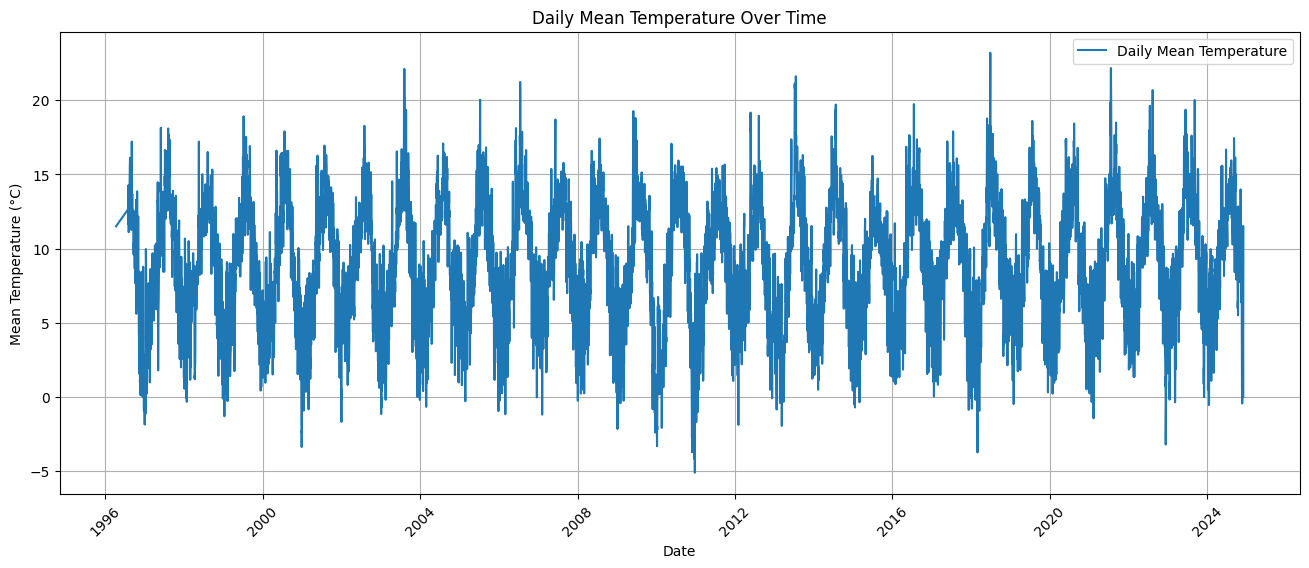

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(daily_mean_temp.index, daily_mean_temp.values, label='Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Daily Mean Temperature Over Time')
plt.xticks(rotation=45) 
plt.legend()
plt.grid(True)
plt.show()

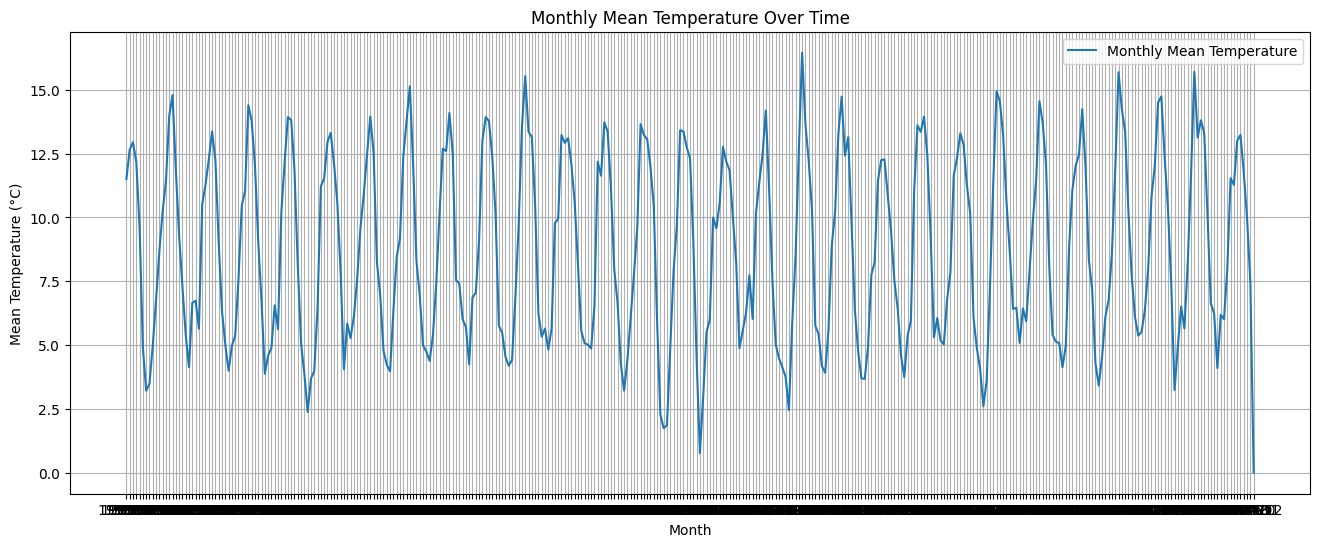

In [ ]:
df['Month'] = df['Time'].dt.to_period('M')  # 'M' stands for month

# calculate the mean temperature for each month by grouping by 'YearMonth'
monthly_mean_temp = df.groupby('Month')['temp'].mean()

# plot the monthly mean temperature over time
plt.figure(figsize=(16, 6))
plt.plot(monthly_mean_temp.index.astype(str), monthly_mean_temp.values, label='Monthly Mean Temperature')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.title('Monthly Mean Temperature Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# check for missing values
missing_values = df['wdsp'].isnull().sum()

print(missing_values)

0


In [ ]:
# takes the values from the column wdsp, and replaces specific values ('', ' ', 'NA', 'N/A', 'null') with pd.NA.
df['WindSpeed'] = df['wdsp'].replace(['', ' ', 'NA', 'N/A', 'null'], pd.NA)


missing_values = df['WindSpeed'].isnull().sum()

print(missing_values) # missing values 50

# Resources
# https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas

50


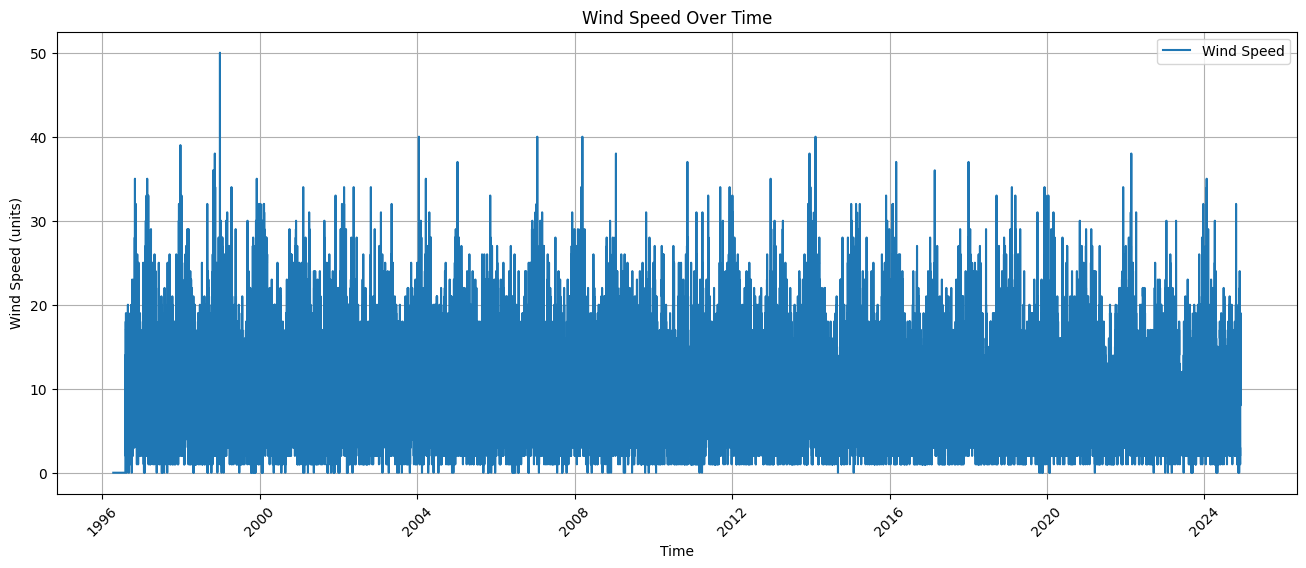

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# ensure 'WindSpeed' is numeric and handle any non-numeric values (replace with NaN), only valid numbers remain
df['WindSpeed'] = pd.to_numeric(df['WindSpeed'], errors='coerce')

# drops missing rows
df_cleaned = df.dropna(subset=['WindSpeed'])

# plot the 'WindSpeed' over time
plt.figure(figsize=(16, 6))
plt.plot(df_cleaned['Time'], df_cleaned['WindSpeed'], label='Wind Speed')
plt.xlabel('Time')
plt.ylabel('Wind Speed (units)')
plt.title('Wind Speed Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()

# Resources
# https://saturncloud.io/blog/convert-pandas-column-to-datetime-a-guide/#:~:text=To%20convert%20a%20pandas%20column,new%20column%20with%20datetime%20values
# https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

In [ ]:
# calculate the mean wind speed for each day by grouping by 'Day'
daily_mean_wdsp = df_cleaned.groupby('Day')['WindSpeed'].mean()

print(daily_mean_wdsp)

Day
1996-04-10     0.000000
1996-07-31     0.000000
1996-08-01     9.956522
1996-08-02     7.625000
1996-08-03     6.666667
                ...    
2024-11-27     3.375000
2024-11-28    14.125000
2024-11-29    12.750000
2024-11-30    13.833333
2024-12-01    12.000000
Name: WindSpeed, Length: 10352, dtype: float64


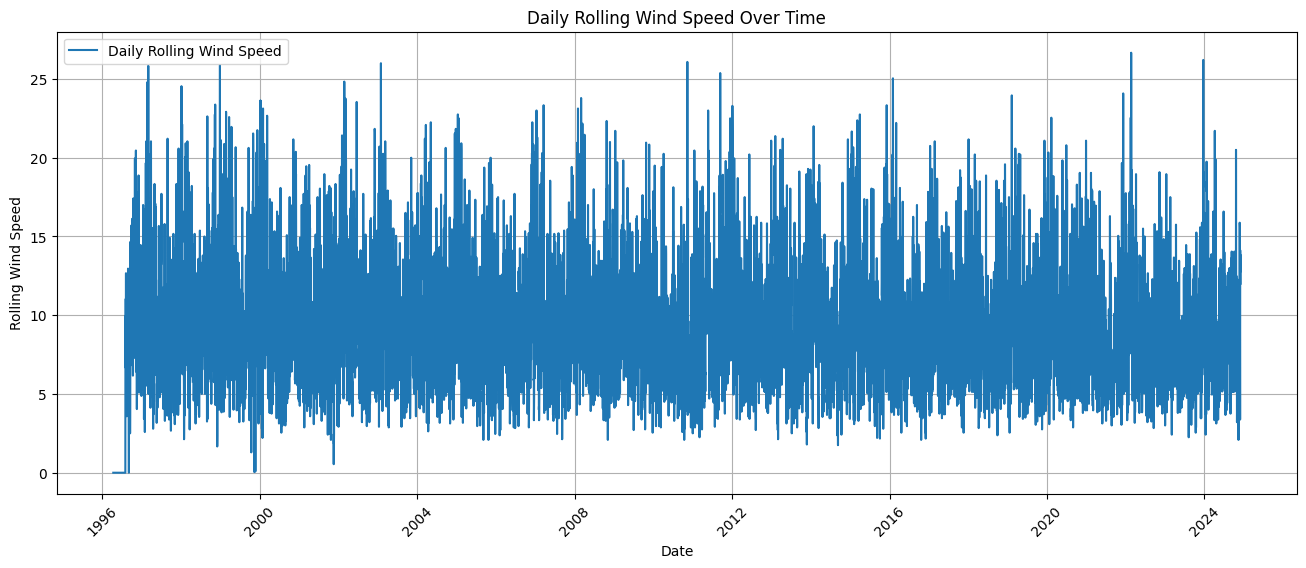

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(daily_mean_wdsp.index, daily_mean_wdsp.values, label='Daily Rolling Wind Speed')
plt.xlabel('Date')
plt.ylabel('Rolling Wind Speed')
plt.title('Daily Rolling Wind Speed Over Time')
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# calculate the mean wind speed for each day by grouping by 'Day'
daily_max_wdsp = df_cleaned.groupby('Day')['WindSpeed'].max()

print(daily_max_wdsp)

Day
1996-04-10     0.0
1996-07-31     0.0
1996-08-01    14.0
1996-08-02    13.0
1996-08-03    10.0
              ... 
2024-11-27     6.0
2024-11-28    19.0
2024-11-29    17.0
2024-11-30    19.0
2024-12-01    12.0
Name: WindSpeed, Length: 10352, dtype: float64


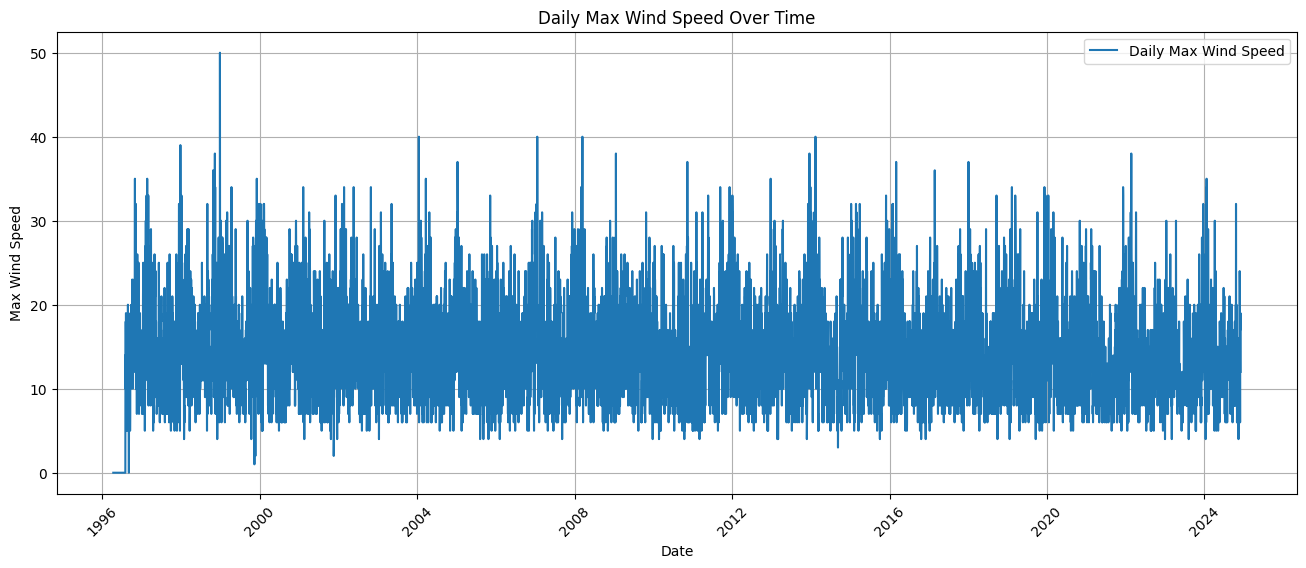

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(daily_max_wdsp.index, daily_max_wdsp.values, label='Daily Max Wind Speed')
plt.xlabel('Date')
plt.ylabel('Max Wind Speed')
plt.title('Daily Max Wind Speed Over Time')
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'])
df_cleaned.set_index('Time', inplace=True)

# calculate daily maximum wind speed
daily_max_wdsp = df_cleaned['WindSpeed'].resample('D').max()

# calculate monthly mean of the daily maximum wind speeds
monthly_mean_daily_max_wdsp = daily_max_wdsp.resample('M').mean()


print(monthly_mean_daily_max_wdsp)

# Resource
# https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/resample-time-series-data-pandas-python/

Time
1996-04-30     0.000000
1996-05-31          NaN
1996-06-30          NaN
1996-07-31     0.000000
1996-08-31    12.516129
                ...    
2024-08-31    14.451613
2024-09-30    12.266667
2024-10-31    13.064516
2024-11-30    11.733333
2024-12-31    12.000000
Freq: M, Name: WindSpeed, Length: 345, dtype: float64


C:\Users\jaked\AppData\Local\Temp\ipykernel_4640\2617404027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'])


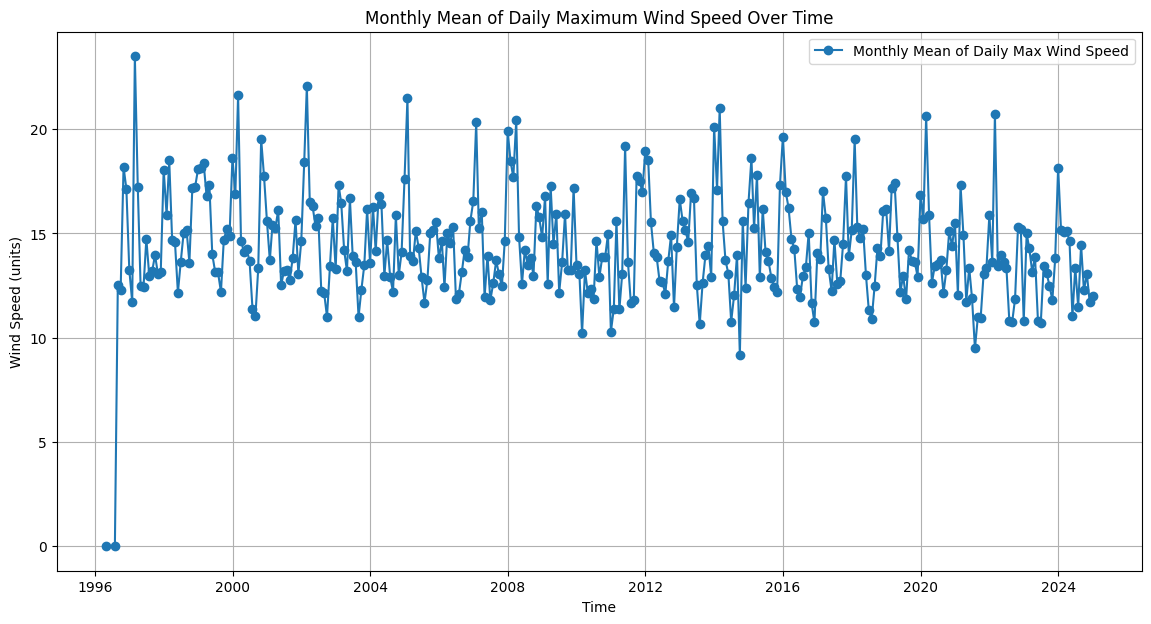

In [53]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_mean_daily_max_wdsp.index, monthly_mean_daily_max_wdsp, marker='o', label='Monthly Mean of Daily Max Wind Speed')
plt.title('Monthly Mean of Daily Maximum Wind Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Speed (units)')
plt.grid(True)
plt.legend()
plt.show()